<a href="https://colab.research.google.com/github/BIGMOUSSA/my_ds_project/blob/main/dit_tp_ml_mdiallo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data
data = pd.read_csv("/content/drive/MyDrive/Telco-Customer-Churn.csv",index_col=0)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
# target 
target = data["Churn"]
target

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: Churn, Length: 7043, dtype: object

In [ ]:
data = data.drop(columns="Churn",axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45


## Data exploration

In [ ]:
# describe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
# présence de na dans totalcharge
data["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
data[data["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,


In [ ]:
# on les remplacer par zéro et les imputer après
test = (data["TotalCharges"]==" ")
data["TotalCharges"]=np.where(test==True,"0",data["TotalCharges"])

# ON SUPPRIME CES DONNEES


In [ ]:
# Total is object we need to change it into float64
data["TotalCharges"]=data["TotalCharges"].astype(dtype="float64")

In [ ]:
# checking null na/null
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
cat_colums = data.select_dtypes("object").columns
#data[cat_colums]

In [ ]:
for col in cat_colums:
  print("************************")
  print(data[col].value_counts())
  print("************************")

************************
Male      3555
Female    3488
Name: gender, dtype: int64
************************
************************
No     3641
Yes    3402
Name: Partner, dtype: int64
************************
************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
************************
************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
************************
************************
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
************************
************************
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
************************
************************
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
************************
************************
No                     3088
Yes                    2429
No internet service    1

In [ ]:
ind_to_drop = data[data["TotalCharges"]==0].index

In [ ]:
#TESTING DROP METHODE
datab= data.drop(index=ind_to_drop)
#target = target.drop(index=ind_to_drop)
data.shape

(7043, 19)

In [ ]:
coef = datab.MonthlyCharges.sum()/datab.TotalCharges.sum()
coef

0.028379186125516976

In [ ]:
test = (data["TotalCharges"]==0)

data["TotalCharges"]=np.where(test==True,data["MonthlyCharges"]/coef,data["TotalCharges"])

In [ ]:
data[test]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1851.709199
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,713.551118
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2848.918910
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,907.355126
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1975.039022
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,699.456282
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,893.260289
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,704.741845
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,694.170718


In [ ]:
data[["SeniorCitizen","tenure"]].describe()

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [ ]:
# la variable SeniorCitizen est binaire on va le transformer en object
data["SeniorCitizen"]=data["SeniorCitizen"].astype("object")

In [ ]:
data["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
# TRANSFORMONS  MONTANT MENS / TOTAL
data["ratio"]=data["MonthlyCharges"]/data["TotalCharges"]

In [ ]:
data.drop(columns=["MonthlyCharges","TotalCharges"],inplace=True)

## DATA VIZ

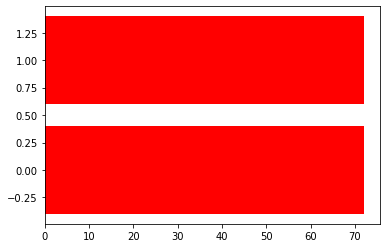

In [ ]:
plt.barh(data["SeniorCitizen"], data["tenure"], color =  'red')   # Horizontal Bars, you can also play around the color, height and the width
plt.show()

# MODELISATION

In [ ]:


from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)



In [ ]:
numerical_columns

['tenure', 'ratio']

In [ ]:
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [ ]:
from sklearn import set_config
set_config(display='diagram')
model



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['tenure', 'ratio'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.3,random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(
    data, target, random_state=42,test_size=0.2,stratify=target)



In [ ]:
_ = model.fit(X_train, Y_train)

In [ ]:
model.predict(X_test)[:5]

array(['No', 'Yes', 'No', 'No', 'No'], dtype=object)

In [ ]:
model.score(X_test, Y_test)

0.8161816891412349

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([0.16166544, 0.18015289, 0.1581645 , 0.16458583, 0.21346331]),
 'score_time': array([0.02499557, 0.02403545, 0.03435397, 0.02674985, 0.02446866]),
 'test_score': array([0.80979418, 0.80979418, 0.79701916, 0.81960227, 0.81178977])}

In [ ]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.810 +/- 0.007


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [ ]:
%%time
_ = model.fit(X_train, Y_train)



CPU times: user 1.05 s, sys: 76.3 ms, total: 1.13 s
Wall time: 606 ms


In [ ]:
model.score(X_test, Y_test)



0.7849538679914834

## TUNING GRIDCHEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'randomforestclassifier__n_estimators':[10,30,50,40,20,80,120,100,130,23,12]},
    {'randomforestclassifier__max_depth':[2,5,7,10,23,10,34,8,3]}, 
    {'randomforestclassifier__max_features':[2,4,6,7,8,9,3,10]}, 
    {'randomforestclassifier__min_samples_leaf':[2,5,9,4,6,3]}

]

#param_grid

In [ ]:
#mod_rf = RandomForestClassifier()
from sklearn.naive_bayes import GaussianNB
mode_rf = make_pipeline(preprocessor, RandomForestClassifier())
mode_knn = make_pipeline(preprocessor, KNeighborsClassifier())
mode_svm = make_pipeline(preprocessor, SVC())
mode_log = make_pipeline(preprocessor, LogisticRegression())
mode_gnb = make_pipeline(preprocessor,GaussianNB())

In [ ]:
#mode_rf.get_params().keys()

In [ ]:
#mode_rf.get_params

In [ ]:
rf = GridSearchCV(
   mode_rf, # modele
   param_grid, #parametres 
   cv=5, # cross validation
   verbose=10

)
#rf.fit(X_train, Y_train)

In [ ]:
# best model 
#rf.best_estimator_

In [ ]:
# parametres du best model
#rf.best_params_

In [ ]:
# best score
#rf.best_score_

## choix du meilleurs parmi les meilleurs


In [ ]:
classifiers =[]
#mode_rf = RandomForestClassifier()
classifiers.append(mode_rf)

#mode_knn= KNeighborsClassifier()
classifiers.append(mode_knn)

#mode_log= LogisticRegression()
classifiers.append(mode_log)

#mode_svm = SVC()
classifiers.append(mode_svm)
#MODE NGB
classifiers.append(mode_gnb)
classifiers

[Pipeline(steps=[('columntransformer',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('categorical',
                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                  unknown_value=-1),
                                                   ['gender', 'SeniorCitizen',
                                                    'Partner', 'Dependents',
                                                    'PhoneService',
                                                    'MultipleLines',
                                                    'InternetService',
                                                    'OnlineSecurity',
                                                    'OnlineBackup',
                                                    'DeviceProtection',
                                                    'TechSupport', 'Strea

In [ ]:
#mode_knn.get_params().keys()

In [ ]:
# best model pour randomforest
param_grid_rf = [
    {'randomforestclassifier__n_estimators':[10,30,50,40,20,80,120,100,130,23,12]},
    {'randomforestclassifier__max_depth':[2,5,7,10,23,10,34,8,3]}, 
    {'randomforestclassifier__max_features':[2,4,6,7,8,9,3,10]}, 
    {'randomforestclassifier__min_samples_leaf':[2,5,9,3,5,6]}

]
#param_grid_rf

In [ ]:
param_grid_knn= [
    {'kneighborsclassifier__n_neighbors':[3,5,7,10,15,12,13,16,19,17,11]}
]
param_grid_knn

[{'kneighborsclassifier__n_neighbors': [3,
   5,
   7,
   10,
   15,
   12,
   13,
   16,
   19,
   17,
   11]}]

In [ ]:
#mode_log.get_params().keys()

In [ ]:
param_grid_log=[
    {'logisticregression__max_iter':[400,450,500,550,600,650,700,800,900,1000]}
]
param_grid_log

[{'logisticregression__max_iter': [400,
   450,
   500,
   550,
   600,
   650,
   700,
   800,
   900,
   1000]}]

In [ ]:
#mode_svm.get_params().keys()

In [ ]:
param_grid_svm=[
    {'svc__C':[2,5,9,7,10,20,40,60,100]},
    {'svc__kernel':['linear','rbf']},
    {'svc__gamma':[0.002,0.6,0.004]}
]
param_grid_svm

[{'svc__C': [2, 5, 9, 7, 10, 20, 40, 60, 100]},
 {'svc__kernel': ['linear', 'rbf']},
 {'svc__gamma': [0.002, 0.6, 0.004]}]

In [ ]:
mode_gnb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'gaussiannb', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__categorical', 'columntransformer__categorical__categories', 'columntransformer__categorical__dtype', 'columntransformer__categorical__handle_unknown', 'columntransformer__categorical__unknown_value', 'gaussiannb__priors', 'gaussiannb__var_smoothing'])

In [ ]:

param_grid_NB = {'gaussiannb__var_smoothing': np.logspace(0,-9, num=100)}

# pour chaque modele choisir le best model

In [ ]:
#rf = GridSearchCV(mode_rf, param_grid_rf, cv=5, verbose=10)
#rf.fit(X_train, Y_train)

In [ ]:
#knn = GridSearchCV(mode_knn, param_grid_knn, cv=5, verbose=10)
#knn.fit(X_train, Y_train)

In [ ]:
#logis = GridSearchCV(mode_log, param_grid_log, cv=5, verbose=10)
#logis.fit(X_train, Y_train)

In [ ]:
#svm=GridSearchCV(mode_svm, param_grid_svm, cv=5, verbose=10)
#svm.fit(X_train, Y_train)

In [ ]:
#gnb=GridSearchCV(mode_gnb, param_grid_NB, cv=5, verbose=10)
#gnb.fit(X_train, Y_train)

In [ ]:
# best models
"""
print('best model random forest: {}'.format(rf.best_estimator_))
print('best model KNN: {}'.format(knn.best_estimator_))
print('best model logistic: {}'.format(logis.best_estimator_))
print('best model SVM: {}'.format(svm.best_estimator_))
print('best model GNB: {}'.format(gnb.best_estimator_))
"""

"\nprint('best model random forest: {}'.format(rf.best_estimator_))\nprint('best model KNN: {}'.format(knn.best_estimator_))\nprint('best model logistic: {}'.format(logis.best_estimator_))\nprint('best model SVM: {}'.format(svm.best_estimator_))\nprint('best model GNB: {}'.format(gnb.best_estimator_))\n"

In [ ]:
# best scores
"""
print('best score random forest: {}'.format(rf.best_score_))
print('best score KNN: {}'.format(knn.best_score_))
print('best score logistic: {}'.format(logis.best_score_))
print('best score SVM: {}'.format(svm.best_score_))
print('best score gnb: {}'.format(gnb.best_score_))
"""

"\nprint('best score random forest: {}'.format(rf.best_score_))\nprint('best score KNN: {}'.format(knn.best_score_))\nprint('best score logistic: {}'.format(logis.best_score_))\nprint('best score SVM: {}'.format(svm.best_score_))\nprint('best score gnb: {}'.format(gnb.best_score_))\n"

In [ ]:
parametres=[]
parametres.append(param_grid_rf)
parametres.append(param_grid_knn)
parametres.append(param_grid_log)
parametres.append(param_grid_svm)
parametres.append(param_grid_NB)
#parametres

In [ ]:
#classifiers

In [ ]:
from sklearn.metrics import balanced_accuracy_score
def gridsearch_dit(models, params,train_x, train_y):
  model_best=[]
  for i in range(len(models)):
    model=GridSearchCV(models[i], params[i], cv=5)
    model.fit(train_x, train_y)
    model_best.append(model.best_estimator_)
  return model_best

In [ ]:
best_model= gridsearch_dit(classifiers, parametres, X_train, Y_train)

In [ ]:
#best_model

In [ ]:
#best_model[5]

## VOTING

In [ ]:
from sklearn.ensemble import VotingClassifier

vot_model = VotingClassifier(
    estimators=[('rf',best_model[0]), 
                ('knn',best_model[1]), 
                ('logis',best_model[2]),
                ('nb',best_model[4])], voting='hard'
                )

vot_model.fit(X_train, Y_train)

VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('categorical',
                                                                                OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                               unknown_value=-1),
                                                                                ['gender',
                                                                                 'SeniorCitizen',
                                                                                 'Partner',
                                                                                 'Dependents',
                                                                                 'PhoneService',
                                                                                 'MultipleLines',
                                                                                 'InternetService',
                                                                                 'OnlineSecurity',
                                                                                 'OnlineBackup',
                                                                                 'DevicePr...
                                                                                OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                               unknown_value=-1),
                                                                                ['gender',
                                                                                 'SeniorCitizen',
                                                                                 'Partner',
                                                                                 'Dependents',
                                                                                 'PhoneService',
                                                                                 'MultipleLines',
                                                                                 'InternetService',
                                                                                 'OnlineSecurity',
                                                                                 'OnlineBackup',
                                                                                 'DeviceProtection',
                                                                                 'TechSupport',
                                                                                 'StreamingTV',
                                                                                 'StreamingMovies',
                                                                                 'Contract',
                                                                                 'PaperlessBilling',
                                                                                 'PaymentMethod'])])),
                                              ('gaussiannb',
                                               GaussianNB(var_smoothing=0.01))]))])

In [ ]:
#vot_model.estimators_

In [ ]:
#vot_model.get_params

In [ ]:
vot_model.predict(X_test)

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
vot_model.score(X_test, Y_test)

0.7913413768630234

In [ ]:
vot_model.score(X_train, Y_train)

0.8162939297124601

In [ ]:
import pickle
pickle.dump(vot_model, open('MDIALLO.sav','wb'))

In [ ]:
loaded_model = pickle.load(open("MDIALLO.sav", 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7913413768630234
